# **Kelompok 2:**
1. Benedicta Winni Lisachritanty (1906299446)
2. Caroline Woenarso (1906375663)
3. Daffi Farhansyah Kurnia (1906375833)
4. Dea Kristina (1906354053)
5. Fria Nurul Hidayat (1906299484)
6. Sitesh Suresh Bhojwani (1906354085)

# **Problem Statment**

## **MixITup Ice Cream**

* MxITup adalah perusahaan rintisan yang dimotori para anak muda yang bergerak di bidang usaha Ice Cream, Boba Drinks, dan Desserts (snacks).
* Saat ini MixITup memiliki 3 cabang di Jakarta, Depok, dan Tangerang. MixITup mendapat respon positif di masyarakat, antrian dine-in dan pesan-antar produk MixITup melebihi kapasitas pelayanan.
* Bulan lalu MixITup mendapatkan pendanaan seri B sebesar Rp. 33 Milyar,-. Rencananya MixITup ingin "scale" business-nya ke kota lain dan melakukan massive marketing.
* Melalui iming-iming diskon 5% untuk beberapa item di tokonya dan pembagian voucher promo diskon, MixITup berhasil mengumpulkan data pelanggan melalui kartu membernya (loyality program).
* Anda adalah Data Analyst junior di MixITup, tugas anda adalah melakukan proses Data Mining dan memberikan informasi/insight dan saran/rekomendasi/strategi ke perusahaan via data.

## **Main Focus**

* How to scale our business?
* How to retain our customers?
* How to make customers' behavior to buy from us (make them stick to us).

**Perubahan Format Data Excel ke CSV**

Data MixITup diberikan dalam format excel. Excel dapat digunakan untuk data yang tidak terlampau besar. File format csv lebih disarankan karena dapat digunakan untuk data yang kecil maupun besar. Oleh karena itu, kita mengubah format file yang diberikan ke dalam format csv.

# **Modules**

In [ ]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Installing the required modules
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 33.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b521306b15de4d3a5d77ba946b5dd9bc33b6855d7f05890c0ad10aca18112350
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=4d0f1d77242e4f1dc0af9a7e994c122487e03b33ac9ac885cbde3bc8ed91af85
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
--2022-10-07 06:36:04--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199

In [ ]:
# Import Modules
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

# **Data Set**

In [ ]:
# Import Data Set from GitHub
file_ = 'data/Customer.csv'
try: # Running Locally
    customer = pd.read_csv(file_, low_memory = False, encoding = 'utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/frianlh/DataMining-Project/main/data/Customer.csv
    customer = pd.read_csv(file_, low_memory = False, encoding = 'utf8')

--2022-10-07 06:37:00--  https://raw.githubusercontent.com/frianlh/DataMining-Project/main/data/Customer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10438 (10K) [text/plain]
Saving to: ‘data/Customer.csv’

Customer.csv        100%[===================>]  10.19K  --.-KB/s    in 0s      

2022-10-07 06:37:00 (91.1 MB/s) - ‘data/Customer.csv’ saved [10438/10438]



In [ ]:
# Data Size
N, P = customer.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)

# Variable Type
print("Tipe Variabel df = ", type(customer))

# Show The First Five Data
customer.head()

baris =  200 , Kolom (jumlah variabel) =  10
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8


In [ ]:
# Show The Last Five Data
customer.tail()

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
195,296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,299,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0
199,300,Pria,50,"Rp1,639,344",14,1,Tangerang,3.0,Minggu,6


In [ ]:
# Data Information
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    int64  
 3   Pendapatan per Bulan  200 non-null    object 
 4   Skor Pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


Note:
- Terdapat beberapa tipe data yang perlu diperbaiki, yaitu `Jenis Kelamin`, `Pendapatan per Bulan`, `Menikah`, `Kota`, `Promo`, `HariFav`, dan `FavFlavor`.
- `Jenis Kelamin` yang awalnya bertipe data object seharusnya bertipe data category.
- `Pendapatan per Bulan` yang awalnya bertipe data object seharusnya bertipe data integer.
- `Menikah` yang awalnya bertipe data object seharusnya bertipe data category.
- `Kota` yang awalnya bertipe data object seharusnya bertipe data category.
- `HariFav` yang awalnya bertipe data object seharusnya bertipe data category.
`FavFlavor` yang awalnya bertipe data integer seharusnya bertipe data category.

# **Pre Processing**

In [ ]:
# Replace Symbol "-" with NaN
df = customer.replace("-", np.NaN)
df.head(200)

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,299,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0


In [ ]:
# Formating Type Data Currency in Variabel Pendapatan per Bulan to Number
df['Pendapatan per Bulan'] = pd.to_numeric(df['Pendapatan per Bulan'].replace('[^0-9\.-]', '', regex = True))
df.head()

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [ ]:
# Type Data Correction
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    200 non-null    int64   
 1   Jenis Kelamin         195 non-null    category
 2   Umur                  200 non-null    int64   
 3   Pendapatan per Bulan  200 non-null    int64   
 4   Skor Pengeluaran      200 non-null    int64   
 5   Menikah               187 non-null    category
 6   Kota                  200 non-null    category
 7   Promo                 194 non-null    category
 8   HariFav               200 non-null    category
 9   FavFlavor             200 non-null    category
dtypes: category(6), int64(4)
memory usage: 8.9 KB


Note: Tipe data sudah sesuai dengan yang seharusnya

In [ ]:
# Duplicate Check Based On ID Customer
print(df['ID'].duplicated().sum())

# Show the Duplicate Data Based on ID Customer
df[df.duplicated(subset = ['ID'])]

0


,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


Note: Tidak terdapat duplicate values pada ID customer.

In [ ]:
# Desciptive Statistics
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,200.0,NaN,NaN,NaN,200.5,57.879185,101.0,150.75,200.5,250.25,300.0
Jenis Kelamin,195,2,Wanita,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,200.0,NaN,NaN,NaN,37.355,11.992417,2.0,28.75,36.0,48.0,60.0
Pendapatan per Bulan,200.0,NaN,NaN,NaN,18672130.69,10764229.971006,0.0,10860655.0,19057377.0,25819672.0,50000000.0
Skor Pengeluaran,200.0,NaN,NaN,NaN,50.47,26.07101,1.0,34.75,50.0,73.0,101.0
Menikah,187,3,1,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,200,3,Jakarta,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,194.0,5.0,1.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,200,7,Senin,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,200.0,10.0,0.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note:
- Pada variabel `Jenis Kelamin` terdapat data yang missing. Hal ini dideteksi ketika melakukan screening data pada file format excel yang tersedia. Selanjutnya, data yang missing tersebut akan diasumsikan bahwa customer tersebut tidak berkenan untuk memberikan informasi terkait jenis kelaminnya. Namun, dalam analisis ini, data-data tersebut akan dikeluarkan.
- Pada variabel `Umur` terdapat customer yang berumur 2 tahun. Hal ini diasumsikan tidak mungkin terjadi karena secara logika, batita belum mampu mendaftarkan dirinya menjadi member di MixITup.
- Pada variabel `Penghasilan per Bulan` terdapat customer dengan penghasilan Rp0. Dalam hal ini, customer tersebut diasumsikan tidak berkenan untuk memberikan informasi nominal penghasilannya. Untuk selanjutnya, data ini akan diikutkan dalam analisis.
- Pada variabel `Skor Pengeluaran` terdapat skor yang melebihi 100, di mana pada data understanding diberikan informasi bahwa skor pengeluaran memiliki range 0-100. Dalam hal ini, data tersebut diasumsikan sebagai **noise**.
- Pada variabel `Menikah` terdapat 3 unique values. Pada analisis selanjutnya dilihat bahwa terdapat values yang bernilai ' ', '0', '1'. Selanjutnya, data yang missing tersebut akan diasumsikan bahwa customer tersebut tidak berkenan untuk memberikan informasi terkait status menikahnya. Namun, dalam analisis ini, data-data tersebut akan dikeluarkan.
- Pada variabel `Kota` terdapat nama kota yang terdeteksi typo, yaitu 'JJakarta'. Hal ini sudah dibetulkan menjadi 'Jakarta' sebelum data ini diimport ke dalam Google Colab.
- Pada variabel `Promo` terdapat 5 unique values yang mana pada data understanding diberikan informasi bahwa promo terdiri dari 4 kategori, yaitu 0, 1, 2, 3. Namun, pada analisis selanjutnya, dilihat bahwa terdapat values, yaitu 5. Dalam hal ini values tersebut diasumsikan sebagai **noise**.
- Pada variabel `FavFlavor` terdapat 10 unique values yang mana pada data understanding diberikan informasi bahwa jenis favorite flavor terdiri dari 0, 1, 3, 4, 5, 6, 7, 8.  Namun, pada analisis selanjutnya, dilihat bahwa terdapat values, yaitu 2 dan 9. Solusi untuk menangani masalah akan dijelaskan lebih lanjut pada section selanjutnya.


In [ ]:
# Unique values pada Variabel Menikah
df['Menikah'].dtypes

CategoricalDtype(categories=[' ', '0', '1'], ordered=False)

In [ ]:
# Unique values pada Variabel Promo
df['Promo'].dtypes

CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 5.0], ordered=False)

In [ ]:
# Unique values pada Variabel FavFlavor
df['FavFlavor'].dtypes

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=False)

Variabel dengan Tipe Data Integer

In [ ]:
# Variable Selection
df_num = df.select_dtypes(include = 'int64')
df_num.head()

,ID,Umur,Pendapatan per Bulan,Skor Pengeluaran
0,101,49,13114754,52
1,102,32,33606557,86
2,103,51,15983606,41
3,104,19,12704918,55
4,105,38,20081967,42


Variabel dengan Tipe Data Kategorik

In [ ]:
df_kat = df.select_dtypes(include = 'category')
df_kat

,Jenis Kelamin,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,1,Jakarta,1.0,Sabtu,2
1,Wanita,1,Depok,1.0,Minggu,6
2,Pria,1,Jakarta,2.0,Minggu,3
3,Pria,0,Jakarta,1.0,Rabu,7
4,Wanita,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...
195,Pria,1,Depok,1.0,Senin,0
196,Pria,1,Jakarta,1.0,Minggu,5
197,Wanita,1,Depok,1.0,Senin,7
198,Wanita,1,Depok,0.0,Selasa,0


### Detecting and Handling Noise

#### Variabel Pengeluaran

In [ ]:
# Noise at Variable Skor Pengeluaran
df[df['Skor Pengeluaran'] == 101]

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
126,227,Wanita,47,18442622,101,NaN,Jakarta,2.0,Minggu,7


In [ ]:
# Drop Row With Index
df.drop([126], axis = 0, inplace = True)
df.shape

(199, 10)

Note: Pada penjelasan sebelumnya telah dicatat bahwa terdapat value 101 pada variabel `skor pengeluaran` dan data tersebut diasumsikan sebagai noise. Dalam hal ini akan dihandle dengan mengeluarkan data tersebut dari data yang akan dianalisis.

#### Variabel Umur

In [ ]:
# Noise at Variable Umur = 2 Tahun & Pendapatan per Bulan > 18 juta rupiah
df[df['Umur'] == 2]

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
119,220,Pria,2,18032786,41,0,Jakarta,2.0,Senin,0


In [ ]:
# Drop Row With Index 119
df.drop([119], axis = 0, inplace = True)
df.shape

(198, 10)

Note: Pada penjelasan sebelumnya telah dicatat bahwa terdapat value 2 pada variabel `umur` dan data tersebut diasumsikan sebagai noise. Dalam hal ini akan dihandle juga dengan mengeluarkan data tersebut dari data yang akan dianalisis.

#### Variabel FavFlavor

In [ ]:
# Noise at Variable FavFlavor = 9
df[df['FavFlavor'] == 9]

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
130,231,Wanita,44,25819672,20,1,Tangerang,3.0,Sabtu,9


In [ ]:
# Drop Row With Index 130
df.drop([130], axis = 0, inplace = True)
df.shape

(197, 10)

Note: Pada penjelasan sebelumnya telah dicatat bahwa terdapat value 9 pada variabel `FavFlavor` dan data tersebut diasumsikan sebagai noise karena tidak terdapat dalam data understanding dan hanya terdapat 1 customer dengan FavFlavor=9. Dalam hal ini akan dihandle juga dengan mengeluarkan data tersebut dari data yang akan dianalisis.

In [ ]:
# Find FavFlavor = 2
df[df['FavFlavor'] == 2]

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
15,116,Wanita,51,11885245,50,NaN,Jakarta,1.0,Minggu,2
22,123,Pria,59,11475409,60,1,Jakarta,1.0,Sabtu,2
23,124,Wanita,44,23770491,7,1,Tangerang,3.0,Sabtu,2
43,144,Wanita,37,33606557,32,1,Tangerang,3.0,Senin,2
51,152,Wanita,23,409836,77,1,Depok,1.0,Selasa,2
53,154,Pria,48,25409836,36,1,Jakarta,2.0,Sabtu,2
54,155,Pria,47,11475409,41,1,Jakarta,2.0,Minggu,2
55,156,Pria,44,1639344,3,1,Tangerang,3.0,Sabtu,2
62,163,Pria,53,12704918,46,1,Jakarta,2.0,Minggu,2


In [ ]:
df[df['FavFlavor'] == 2].shape

(20, 10)

Note: Pada penjelasan sebelumnya telah dicatat bahwa juga terdapat value 2 pada variabel FavFlavor yang mana tidak terdapat dalam data understanding. Terdapat 20 rows dengan data ini sehingga diasumsikan bahwa rasa ice cream tersebut sebenarnya ada namun tidak dituliskan dalam data understanding. Dalam hal ini akan dihandle dengan mengasumsikan bahwa FavFlavor tersebut adalah rasa ice cream lainnya dan tidak dikeluarkan dari data.

#### Variabel Promo

In [ ]:
# Noise at Variable Promo = 5
df[df['Promo'] == 5]

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
14,115,Wanita,58,2049180,15,1,Tangerang,5.0,Sabtu,8


In [ ]:
# Drop Row With Index 14
df.drop([14], axis = 0, inplace = True)
df.shape

(196, 10)

Note: Pada penjelasan sebelumnya telah dicatat bahwa terdapat value 5 pada variabel `Promo` dan data tersebut diasumsikan sebagai noise karena tidak terdapat dalam data understanding dan hanya terdapat 1 customer dengan Promo=5. Dalam hal ini akan dihandle juga dengan mengeluarkan data tersebut dari data yang akan dianalisis.

### Missing Values

In [ ]:
df_new = df.copy()

In [ ]:
# Get Total Missing Values
print(df_new.isnull().sum())

ID                       0
Jenis Kelamin            5
Umur                     0
Pendapatan per Bulan     0
Skor Pengeluaran         0
Menikah                 12
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64


In [ ]:
# Drop Missing Values
df_new = df_new.dropna()

In [ ]:
# Get Data Dimension
df_new.shape

(173, 10)

Note:
- Sesuai dengan penjelasan sebelumnya, terdapat 5 missing values pada `Jenis Kelamin`, 12 missing values pada `Menikah`, dan 6 missing values pada `Promo`.
- Dalam hal ini missing values tersebut akan dihandle dengan dropping rows pada data-data yang missing tersebut. Hal ini dilakukan karena jika dilakukan imputasi pada data memiliki kemungkinan untuk memberikan interpretasi yang salah dalam analisis customer segmentation selanjutnya. Maka dari itu, missing data tersebut akan dikeluarkan dari analisis.

# **Exploratory Data Analysis**

## Detecting Outliers

### Variabel Umur

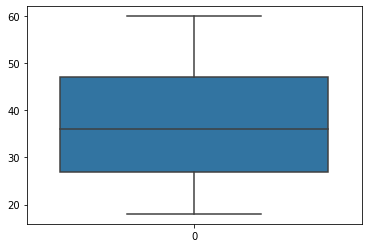

In [ ]:
# Umur Distribution
p = sns.boxplot(data = df_new['Umur'])

Note: Tidak terdapat deteksi outlier pada variabel `Umur`.

### Variabel Pendapatan per Bulan

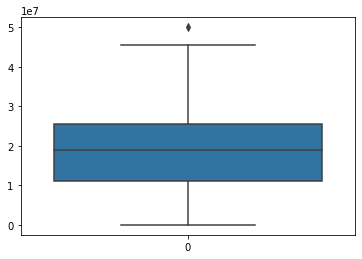

In [ ]:
p = sns.boxplot(data = df_new['Pendapatan per Bulan'])

In [ ]:
df_new.shape

(173, 10)

In [ ]:
def check_outlier(data, column):
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3 - q1

  new_column = []

  for x in data[column]:
    if x < q1 - 1.5 * iqr:
      new_column.append('outlier')
    elif x > q3 + 1.5 * iqr:
      new_column.append('outlier')
    else:
      new_column.append('non-outlier')
  
  return new_column

In [ ]:
df_new['outlier_pendapatan'] = check_outlier(data=df_new, column='Pendapatan per Bulan')

In [ ]:
df_new[df_new['outlier_pendapatan'] == 'outlier']

,ID,Jenis Kelamin,Umur,Pendapatan per Bulan,Skor Pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,outlier_pendapatan
66,167,Pria,30,50000000,83,1,Depok,1.0,Sabtu,3,outlier


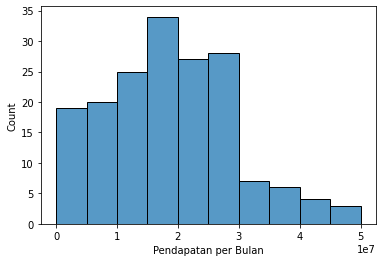

In [ ]:
sns.histplot(data = df_new['Pendapatan per Bulan'])

Note:
- Terdapat 1 data outlier pada variabel penghasilan di mana customer tersebut memiliki pendapat per bulan sebesar Rp50.000.000.
- Jika dianalisis lebih lanjut, customer tersebut memiliki pendapatan yang tinggi dengan skor pengeluaran yang tinggi, namun masuk ke dalam kategori jarang menggunakan promo.
- Hal ini dapat menjadi **catatan bagi perusahaan** bahwa customer tersebut berpotensi untuk menjadi customer yang loyal bagi perusahaan karena customer tersebut memberikan pendapatan yang tinggi bagi perusahaan tanpa menggunakan promo.
- Namun, dalam analisis ini outlier tersebut akan dikeluarkan karena jika dilihat dari plot distribusi, distribusi variabel `Penghasilan per Bulan` cenderung skewed.

In [ ]:
# Remove Outlier
df_final = df_new[df_new['outlier_pendapatan'] == 'non-outlier']

In [ ]:
df_final.drop(['outlier_pendapatan'], axis = 1, inplace = True)

In [ ]:
df_final.shape

(172, 10)

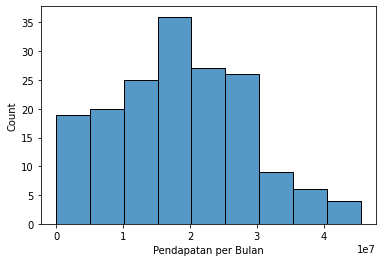

In [ ]:
sns.histplot(data = df_final['Pendapatan per Bulan'])

Note: Setelah outlier dikeluarkan dari data, maka distribusi pada variabel `Pendapatan per Bulan` cenderung lebih normal daripada sebelum outlier dikeluarkan.

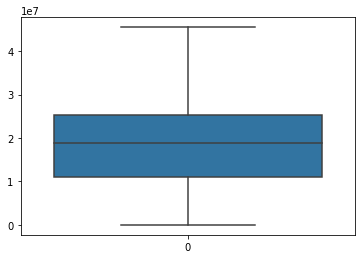

In [ ]:
# Boxplot Variable Pendapatan per Bulan setelah Outlier dikeluarkan
p = sns.boxplot(data = df_final['Pendapatan per Bulan'])

### Variabel Skor Pengeluaran

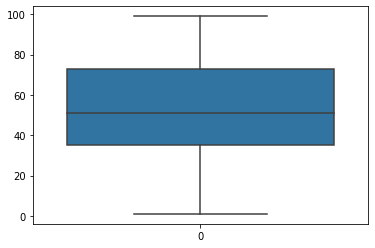

In [ ]:
p = sns.boxplot(data = df_new['Skor Pengeluaran'])

Note: Tidak terdapat deteksi outlier pada variabel `Skor Pengeluaran`.

## Notes for MixITup

### Case 1: 

Pertama-tama akan dilakukan analisis terkait kota mana yang cocok untuk membuka cabang baru dari MixITup. Analisis dilakukan dengan mempertimbangkan kota, intensitas penggunaan promo, dan skor pengeluaran para member. 

In [ ]:
# Count Data by Variable Kota
kota_count  = df_final['Kota'].value_counts()
kota_count

Jakarta      76
Depok        53
Tangerang    43
Name: Kota, dtype: int64

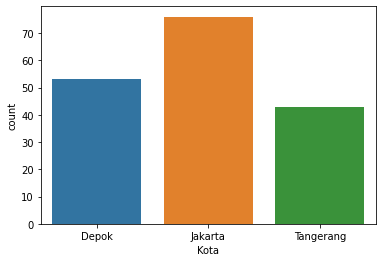

In [ ]:
p = sns.countplot(x = 'Kota', data = df_final)

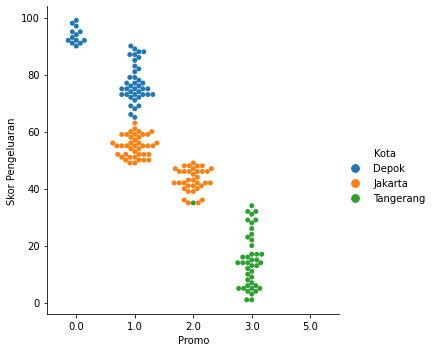

In [ ]:
p = sns.catplot(x = 'Promo', y = 'Skor Pengeluaran', hue = 'Kota', kind = 'swarm', data = df_final)

Berdasarkan data, kota Jakarta merupakan kota dengan member terbanyak, yakni 77 customers. Kemudian setelah melihat penggunaan promo yang dilakukan oleh para customers dari masing-masing kuota, diketahui bahwa para member atau customers yang berada di kota Jakarta cukup interaktif dalam memanfaatkan promo yang ditawarkan oleh MixITup. Oleh karena itu, kota Jakarta memiliki potensi yang cukup baik untuk membuka cabang baru dikarenakan jumlah customers yang tinggi serta tingkat penggunaan promo yang baik dari para member. Harapannya, dengan memanfaatkan jumlah member atau customers yang tinggi serta keaktifan para member dalam menggunakan promo, bisa mendatangkan customer baru saat membuka cabang baru di Jakarta dengan word-of-mouth marketing.

### Case 2:

Akan dilakukan analisis terkait jumlah man-power yang perlu disediakan oleh MixITup dengan mempertimbangkan variabel ‘HariFav’ dari para members. Variabel ‘HariFav’ dapat menjadi data yang merepresentasikan tingkat keramaian dari MixITup pada masing-masing harinya. 

In [ ]:
# Count Data by Variable HariFav
hari_count  = df_final['HariFav'].value_counts()
hari_count

Senin     61
Sabtu     47
Minggu    31
Selasa    19
Kamis      6
Rabu       5
Jumat      3
Name: HariFav, dtype: int64

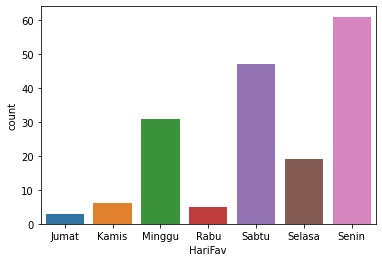

In [ ]:
p = sns.countplot(x = 'HariFav', data = df_final)

Berdasarkan data, terlihat bahwa hari favorit dari sebagian besar member MixITup adalah Senin, Sabtu, dan Minggu, respectively. Oleh karena itu, MixITup perlu meningkatkan pelayanan dengan menambah jumlah pelayan (meningkatkan man-power) pada ketiga hari tersebut serta meningkatkan stock barang, dalam kasus ini ice cream, yang dijual.
Kemudian terlihat bahwa para member MixITup kurang mem-favoritkan hari Jumat dan Rabu. Oleh karena itu, jumlah pelayan dan stock barang pada hari Jumat dan Rabu dapat dikurangkan dan dialokasikan ke hari-hari lainnya, terutama Senin, Sabtu, dan Minggu.

Dengan melakukan hal-hal di atas, MixITup dapat mengoptimalkan man-power dan alokasi operational cost hariannya sesuai dengan kebutuhan dan dapat memaksimalkan profit yang diperoleh.

### Case 3:

Selanjutnya, akan dilakukan analisis guna merencanakan massive marketing yang dapat dilakukan oleh MixITup. Marketing ini tidak hanya untuk menarik customers baru untuk cabang baru dari MixITup tapi juga cabang-cabang lama lainnya. Massive marketing yang akan dilakukan adalah dengan pemberian promo. Pemberian promo pada umumnya dilakukan untuk 3 menargetkan 3 tipe customers, yakni:
- Memikat customers baru yang dapat dikonversikan sebagai member. 
- Mempertahankan para customers yang telah menjadi member dan sudah sering membeli produk-produk MixITup (retained customers).
- Memikat para customers yang telah menjadi member, namun belum cukup sering membeli produk-produk MixITup dan membuatnya menjadi lebih sering membeli (less-retained customers).


Pertama-tama akan dilakukan analisis untuk menentukan skema promo yang akan ditawarkan MixITup kepada para customersnya dengan upaya untuk meningkatkan jumlah pembelian, terutama untuk produk (rasa) ice cream yang kurang diminati para member.


In [ ]:
# Count Data by Variable FavFlavor
flavor_count  = df_final['FavFlavor'].value_counts()
flavor_count

0    35
1    19
4    19
8    18
3    17
5    17
7    17
2    16
6    14
9     0
Name: FavFlavor, dtype: int64

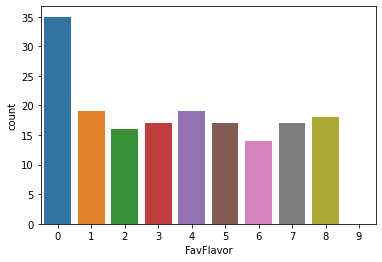

In [ ]:
p = sns.countplot(x = 'FavFlavor', data = df_final)

Berdasarkan data, terlihat bahwa rasa Vanilla merupakan rasa yang paling diminati oleh para member dan rasa Coconut, Cokelat, dan “Lainnya” kurang diminati. Oleh karena itu, demi meningkatkan jumlah penjualan dari ketiga rasa yang kurang diminati tersebut, MixITup dapat membuat skema promo atau pemaketan produk sebagai berikut.
- Paket rasa Vanilla dan Coconut
- Paket rasa Vanilla dan Cokelat
- Paket rasa Vanilla dan “Lainnya”
Ketiga paket tersebut hanya dapat dibeli oleh para customers yang telah mendaftarkan diri sebagai member (dengan tujuan meningkatkan jumlah membership, menargetkan para customers baru) dan memberikan penghematan kepada para member sebesar 15-20% dari harga normal (dengan tujuan mempertahankan dan meningkatkan jumlah pembelian para member, menargetkan retained customers dan less-retained customers).


# **Clustering**

In [ ]:
#CLUSTERING

Promo= pd.get_dummies(df_final['Promo'], prefix='Promo')
Promo.drop("Promo_5.0",axis=1,inplace=True)
Promo.shape

(172, 4)

In [ ]:
df_standar_Umur = (df_final["Umur"] - df_final["Umur"].mean()) / df_final["Umur"].std()
df_standar_Pendapatan_per_Bulan = (df_final["Pendapatan per Bulan"] - df_final["Pendapatan per Bulan"].mean()) / df_final["Pendapatan per Bulan"].std()
df_standar_Skor_Pengeluaran = (df_final["Skor Pengeluaran"] - df_final["Skor Pengeluaran"].mean()) / df_final["Skor Pengeluaran"].std()

In [ ]:
df_cluster=pd.concat([df_standar_Umur,df_standar_Pendapatan_per_Bulan,df_standar_Skor_Pengeluaran,Promo],axis=1)

In [ ]:
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = 10)
kmPP.fit(df_cluster)

KMeans(n_clusters=4, random_state=10)

array([1, 3, 1, 0, 1, 3, 0, 0, 0, 0], dtype=int32)

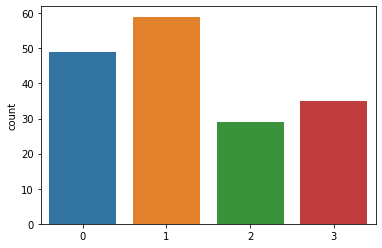

In [ ]:
C_kmpp = kmPP.predict(df_cluster)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

In [ ]:
random_state=99

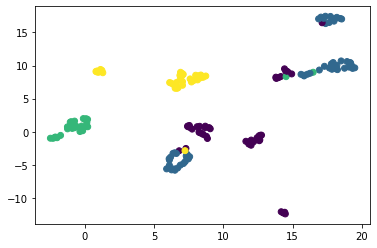

In [ ]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(df_cluster)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

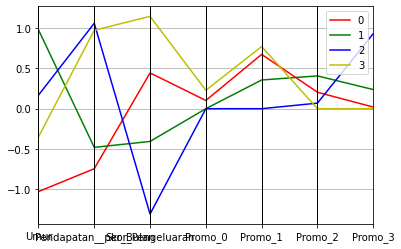

In [ ]:
cols = ['Umur','Pendapatan__per_Bulan','Skor_Pengeluaran','Promo_0','Promo_1','Promo_2','Promo_3']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index
pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','y'))
plt.show()

Text(0.5, 1.0, 'Elbow curve')

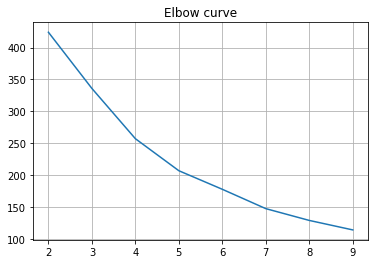

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
  kmeans = cluster.KMeans(n_clusters=k).fit(df_cluster)
  distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

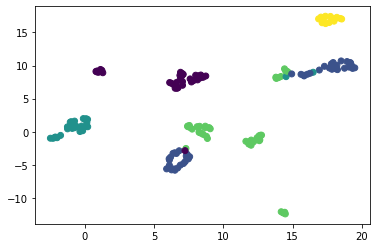

In [ ]:
k=5
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = 10)
kmPP.fit(df_cluster)

C_kmpp = kmPP.predict(df_cluster)

X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(df_cluster)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

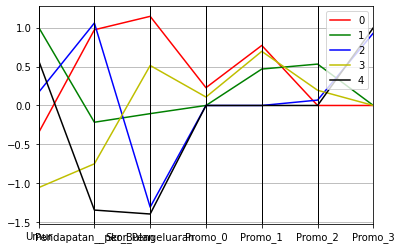

In [ ]:
cols = ['Umur','Pendapatan__per_Bulan','Skor_Pengeluaran','Promo_0','Promo_1','Promo_2','Promo_3']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index
pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','y','black'))
plt.show()

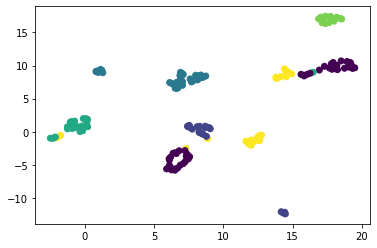

In [ ]:
k=6
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = 10)
kmPP.fit(df_cluster)

C_kmpp = kmPP.predict(df_cluster)

X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(df_cluster)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

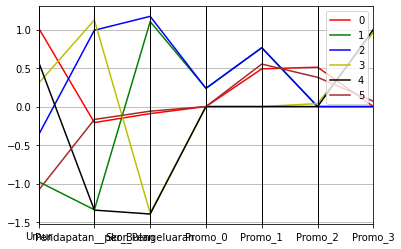

In [ ]:
cols = ['Umur','Pendapatan__per_Bulan','Skor_Pengeluaran','Promo_0','Promo_1','Promo_2','Promo_3']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index
pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','y','black','brown'))
plt.show()

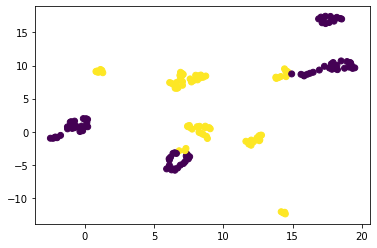

In [ ]:
k=2
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = 10)
kmPP.fit(df_cluster)

C_kmpp = kmPP.predict(df_cluster)

X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(df_cluster)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

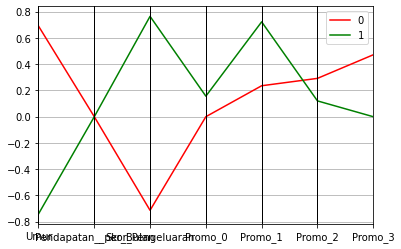

In [ ]:
cols = ['Umur','Pendapatan__per_Bulan','Skor_Pengeluaran','Promo_0','Promo_1','Promo_2','Promo_3']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index
pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','y','black','brown'))
plt.show()

Pada tahap clustering, kami memilih untuk menggunakan 4 variabel, yaitu Umur, Pendapatan per bulan, Skor Pengeluaran, dan Promo. Untuk Promo, dikarenakan variabel tersebut adalah variabel kategorik, akan dilakukan One hot encoding variabel tersebut. Ketiga variabel Numerik akan dilakukan normalisasi data. Keempat variabel ini dipilih karena kami ingin melihat segmen-segmen yang dapat mempengaruhi pembeli untuk meningkatkan penjualan (melihat segmen member yang memiliki budget yang cukup besar agar bisa membeli lebih banyak). Dari plot elbow curve, dapat dilihat bahwa kurva memang menurun secara signifikan, dan ada lekukan pada K= 4,5 dan 6. 

Akan dicoba hasil untuk k=4,5,6. namun setelah dilihat untuk plot k=4,5,6, hasil interpretasi yang didapat sulit karena terlalu banyak segmen yang terbentuk. Maka dari itu, kami akan menggunakan cluster yaitu unutk k =2. Untuk k=2, dapat dilihat bahwa terdapat 2 kluster yaitu: 
- 0 -> Umur yang tergolong masih muda dengan pendapatan tidak berpengaruh namun skor pengeluran tergolong tinggi, member cenderung jarang menggunakan promo.
- 1-> Untuk member yang tergolong tua dengan skor pengeluran yang kecil. member lebih sering melakukan pembelian pada saat ada promo. Hal ini untuk menjaga member tersebut tetap membeli produk, dapat diberikan promo yang lebih banyak untuk meningkatan pembelian dari member.

# **Kesimpulan**

Actionable Action MixITup:
- MixITup dapat membuka cabang baru di kota Jakarta dan memanfaatkan jumlah banyaknya member dan keaktifan para member guna mempromosikan tempat serta produk MixITup kepada khalayak dengan word-of-mouth marketing.
- Mengalokasikan jumlah pelayan dan stock produk hari Jumat dan Rabu ke hari Senin, Sabtu, dan Minggu guna mengoptimalkan man-power dan alokasi operational cost hariannya sesuai dengan kebutuhan harian serta dapat memaksimalkan profit yang diperoleh.
- Membuat skema promo pemaketan produk guna meningkatkan jumlah pembelian dari produk-produk yang kurang diminati, meningkatkan jumlah member, mempertahankan retained customers, dan membangun kebiasaan pembelian dari para less-retained customers.

# **Recommendation**

- Untuk memberikan interpretasi yang lebih mendalam terkait dengan loyalitas customer terhadap MixITup berdasarkan jumlah transaksi per bulan tiap custmer, maka diperlukan data transaksi. Data tersebut juga dapat dilengkapi dengan tanggal dilakukan transaksi dan tanggal customer menggunakan promo sehingga dapat dilihat tren waktu customer menggunakan promo tersebut (misalkan promo cenderung sering digunakan saat liburan anak sekolah sehingga tim marketing MixITup dapat membuat promo pada masa liburan tersebut). Hal ini juga dapat diperdalam lagi dengan menyediakan jenis promo yang digunakan. Dengan demikian, perusahaan dapat melihat promo mana yang signifikan meningkatkan sales dan promo mana yang kurang signifikan dalam meningkatkan sales sehingga selanjutnya promo tersebut bisa dipertimbangkan lagi.
- Dalam hal scaling the business, perushaaan dapat melengkapi data dengan keterangan customer lebih suka untuk take away atau dine in. Apabila lebih banyak customer yang melakukan dine in, maka dapat direkomendasikan bagi perusahaan untuk memperluas toko untuk menyediakan tempat yang lebih luas dan nyaman bagi customer. Apabila lebih banyak customer yang melakukan take away, maka perusahaan dapat memfokuskan scaling the business pada hal lainnya seperti mempertimbangkan untuk membuat cabang baru atau berfokus pada peningkatan pelayan pada cabang tersebut.
- Dalam hal untuk menentukan platform terbaik untuk membuat iklan, maka dapat ditambahkan data tempat pertama mereka mengetahui MixItUp pertama kali (funnel).
- Dapat direkomendasikan untuk menambahkan pukul berapa biasanya pembelian ice cream dilakukan agar bisa disesuaikan dengan pekerja yang harus dikerahkan agar mencapai cost efisiensi. Dengan kata lain, pada waktu yang sering terjadi transaksi dikerahkan pekerja yang lebih banyak dan saat jarang terjadi transaksi lebih sedikit pekerja yang dikerahkan.
